In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
data_dynamic1 = pd.read_csv(r"06.2.w_e_030321_fcdDynamicData.csv")
data_dynamic2 = pd.read_csv(r"06.2.w_e_040321_fcdDynamicData.csv")
data_dynamic3 = pd.read_csv(r"06.2.w_e_050321_fcdDynamicData.csv")
data_dynamic4 = pd.read_csv(r"06.2.w_e_150321_fcdDynamicData.csv")

data_static = pd.read_csv(r"06.2.w_e_fcdStaticData.csv")







In [2]:
df1 = data_dynamic1.merge(data_static, on='segmentId', how='left') 
df2 = data_dynamic2.merge(data_static, on='segmentId', how='left') 
df3 = data_dynamic3.merge(data_static, on='segmentId', how='left') 
df4_testdata = data_dynamic4.merge(data_static, on='segmentId', how='left') 



df4_testdata

,discoveryTime,segmentId,travelTime,coverage,lengthmm,speedLimitKph
0,2021-03-15 00:00:00,131016,1576,10,30651,70
1,2021-03-15 00:00:00,134879,1311,10,25508,70
2,2021-03-15 00:00:00,135146,1539,10,29935,70
3,2021-03-15 00:00:00,182928,1769,10,34413,70
4,2021-03-15 00:00:00,182929,1769,10,34413,70
...,...,...,...,...,...,...
82578,2021-03-15 23:56:00,7425668,3062,10,42529,50
82579,2021-03-15 23:56:00,7425669,3062,10,42529,50
82580,2021-03-15 23:56:00,7452950,3480,10,48346,50
82581,2021-03-15 23:56:00,7452951,2036,10,28279,50


In [3]:

d1 = pd.concat((df1,df2),axis = 0)

df1 = pd.concat((d1,df3),axis = 0)

df1.reset_index(inplace=True)

df1.drop("coverage", axis = 1,inplace = True)
df1.drop("index", axis = 1, inplace = True)

df1

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph
0,2021-03-03 00:00:00,131016,1576,30651,70
1,2021-03-03 00:00:00,134879,1311,25508,70
2,2021-03-03 00:00:00,135146,1539,29935,70
3,2021-03-03 00:00:00,182928,1769,34413,70
4,2021-03-03 00:00:00,182929,1769,34413,70
...,...,...,...,...,...
263391,2021-03-05 23:55:00,7425668,3062,42529,50
263392,2021-03-05 23:55:00,7425669,3062,42529,50
263393,2021-03-05 23:55:00,7452950,3480,48346,50
263394,2021-03-05 23:55:00,7452951,2036,28279,50


In [4]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()



"""
df1['discoveryTime'] = df1['discoveryTime'].str[11:]
df4_testdata['discoveryTime'] = df4_testdata['discoveryTime'].str[11:]"""



df4_testdata.sort_values(by = "segmentId", ascending=True)

df4_testdata["segmentId"] = le1.fit_transform(df4_testdata["segmentId"])



In [5]:


df4_testdata["travelTime"] = df4_testdata["travelTime"]*2.77777778 * (1/10000000)

df4_testdata["lengthmm"] = df4_testdata["lengthmm"]*(1/1000000)


df2_testdata= pd.DataFrame(df4_testdata)

df2_testdata['speed'] = df2_testdata["lengthmm"] / df2_testdata["travelTime"]



df1["travelTime"] = df1["travelTime"]*2.77777778 * (1/10000000)

df1["lengthmm"] = df1["lengthmm"]*(1/1000000)


df2= pd.DataFrame(df1)

df2['speed'] = df1["lengthmm"] / df1["travelTime"]

df2

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph,speed
0,2021-03-03 00:00:00,131016,0.000438,0.030651,70,70.014975
1,2021-03-03 00:00:00,134879,0.000364,0.025508,70,70.044851
2,2021-03-03 00:00:00,135146,0.000428,0.029935,70,70.023392
3,2021-03-03 00:00:00,182928,0.000491,0.034413,70,70.032108
4,2021-03-03 00:00:00,182929,0.000491,0.034413,70,70.032108
...,...,...,...,...,...,...
263391,2021-03-05 23:55:00,7425668,0.000851,0.042529,50,50.001437
263392,2021-03-05 23:55:00,7425669,0.000851,0.042529,50,50.001437
263393,2021-03-05 23:55:00,7452950,0.000967,0.048346,50,50.013103
263394,2021-03-05 23:55:00,7452951,0.000566,0.028279,50,50.002161


In [6]:

df2.sort_values(by = "segmentId", ascending=True)

df2["segmentId"] = le1.fit_transform(df2["segmentId"])

In [7]:
df2

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph,speed
0,2021-03-03 00:00:00,0,0.000438,0.030651,70,70.014975
1,2021-03-03 00:00:00,1,0.000364,0.025508,70,70.044851
2,2021-03-03 00:00:00,2,0.000428,0.029935,70,70.023392
3,2021-03-03 00:00:00,3,0.000491,0.034413,70,70.032108
4,2021-03-03 00:00:00,4,0.000491,0.034413,70,70.032108
...,...,...,...,...,...,...
263391,2021-03-05 23:55:00,302,0.000851,0.042529,50,50.001437
263392,2021-03-05 23:55:00,303,0.000851,0.042529,50,50.001437
263393,2021-03-05 23:55:00,304,0.000967,0.048346,50,50.013103
263394,2021-03-05 23:55:00,305,0.000566,0.028279,50,50.002161


<AxesSubplot:xlabel='segmentId'>

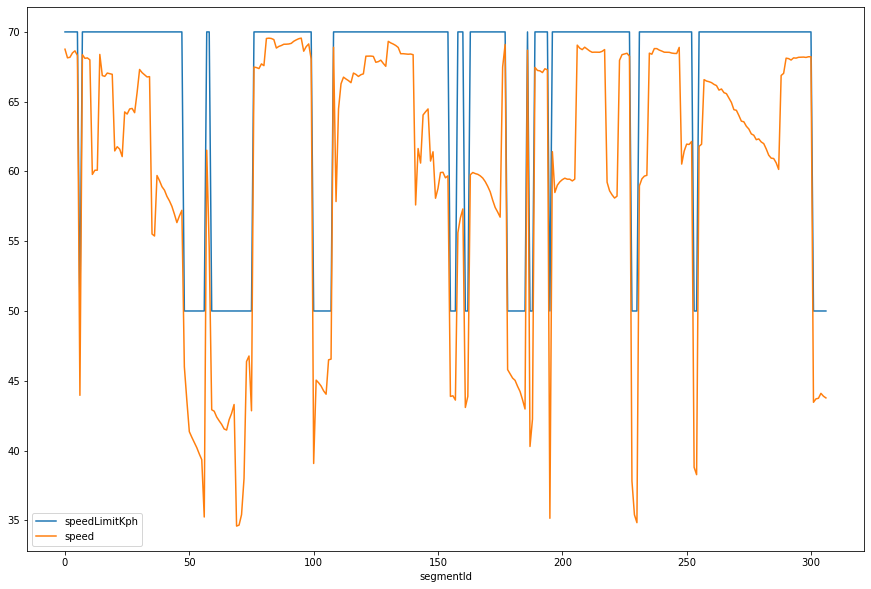

In [8]:
x_data1 = df2[["segmentId","speedLimitKph","speed"]]

x1_data = x_data1.groupby(by="segmentId").mean()               #????

x1_data.plot(figsize=(15,10))

In [35]:
df_segment = x1_data["speed"]<45

df1 = df_segment.reset_index()

df1.drop(df1[df1['speed'] == False].index, inplace=True)

df1["segmentId"].unique()

array([  6,  49,  50,  51,  52,  53,  54,  55,  56,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  75, 100, 102,
       103, 104, 105, 155, 156, 157, 161, 162, 182, 183, 184, 185, 187,
       188, 195, 228, 229, 230, 253, 254, 301, 302, 303, 304, 305, 306],
      dtype=int64)

In [10]:
def segmentId(k):
    df_segment = df2["segmentId"] == k

    dff = df_segment.reset_index()

    dff = dff.drop("index", axis=1)

    dff["ss"] = dff["segmentId"]

    dff1 = pd.concat((df2,dff),axis = 1)


    dff1.drop(dff1[dff1['ss'] == False].index, inplace=True)


    return dff1

In [11]:
dff1 = segmentId(49)

<AxesSubplot:xlabel='discoveryTime'>

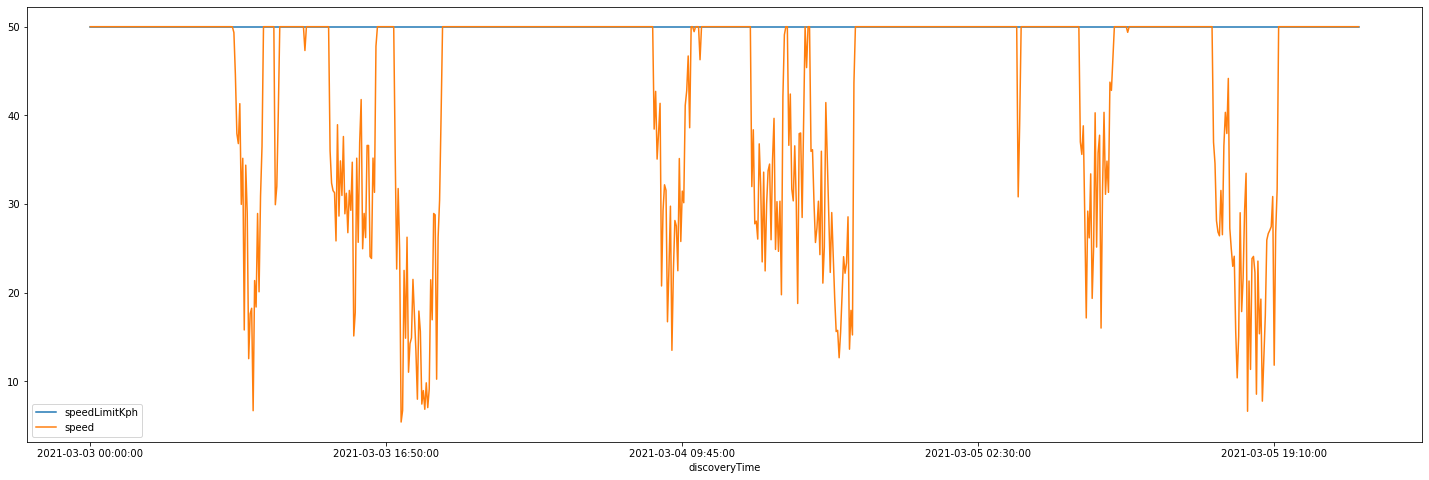

In [12]:
x_data = dff1[["discoveryTime","speedLimitKph","speed"]]

x_data.set_index("discoveryTime")

#x_data.groupby(by="discoveryTime").mean().plot(figsize=(15,5) )
x_data.set_index("discoveryTime").plot(figsize=(25,8))



In [13]:


x_data.reset_index(inplace =True)


In [14]:
x_data = x_data.drop(["index","speedLimitKph"], axis = 1)


In [15]:
x_data.set_index("discoveryTime",inplace=True)

x_data.index=pd.to_datetime(x_data.index)


In [16]:
from statsmodels.tsa.stattools import adfuller


result=adfuller(x_data['speed'])


dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -5.289469607265116,
 'pvalue': 5.757478535244826e-06,
 'usedlag': 18,
 'nobs': 839,
 'criticalvalues': {'1%': -3.438168140637663,
  '5%': -2.864991017121922,
  '10%': -2.5686076019468094},
 'icbest': 5042.977853564223}

In [17]:
x_data['1difference']=x_data['speed']-x_data['speed'].shift(1)

<AxesSubplot:xlabel='discoveryTime'>

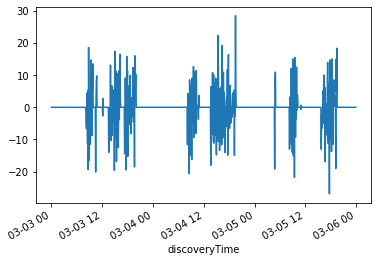

In [18]:
x_data['1difference'].plot()

In [19]:
result=adfuller(x_data['1difference'].dropna())
result

(-7.8480908104592135,
 5.697395588318449e-12,
 21,
 835,
 {'1%': -3.4382057088878644,
  '5%': -2.865007578546518,
  '10%': -2.5686164240381513},
 5058.490087647511)

<AxesSubplot:xlabel='discoveryTime'>

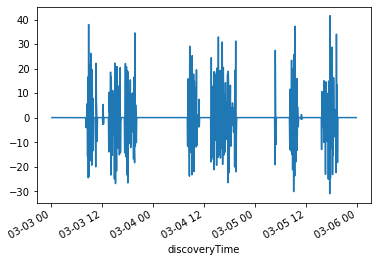

In [20]:
x_data['2difference']=x_data['1difference']-x_data['1difference'].shift(1)
x_data['2difference'].plot()

In [21]:
result=adfuller(x_data['2difference'].dropna())
result

(-12.501402674920872,
 2.8012893888732866e-23,
 16,
 839,
 {'1%': -3.438168140637663,
  '5%': -2.864991017121922,
  '10%': -2.5686076019468094},
 5107.303364675661)

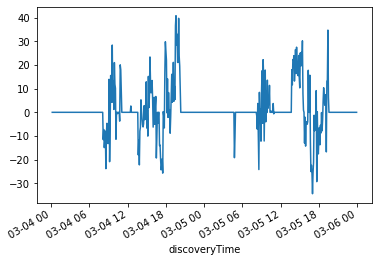

In [22]:
x_data['Seasonal_Difference']=x_data['speed']-x_data['speed'].shift(288)


ax=x_data['Seasonal_Difference'].plot()

In [23]:
result=adfuller((x_data['Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -5.509472114789585,
 'pvalue': 1.987137447089181e-06,
 'usedlag': 19,
 'nobs': 550,
 'criticalvalues': {'1%': -3.442295604706236,
  '5%': -2.866809328264463,
  '10%': -2.569576376859504},
 'icbest': 3659.0800004830867}

In [24]:
x_data['Seasonal_Difference1']=x_data['Seasonal_Difference']-x_data['Seasonal_Difference'].shift(288)

In [25]:
result=adfuller(x_data['Seasonal_Difference1'].dropna())
result

(-3.1605957151338866,
 0.02238188527493736,
 10,
 271,
 {'1%': -3.4547128138328875,
  '5%': -2.8722649771800155,
  '10%': -2.5724850011573914},
 2063.2239988080573)

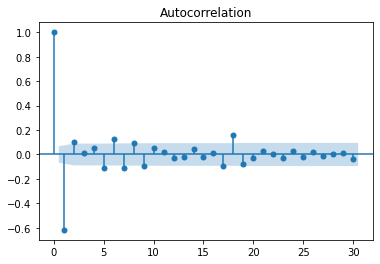

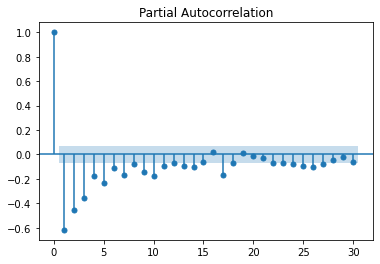

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig1=plot_acf(x_data['2difference'].dropna())

fig2=plot_pacf(x_data['2difference'].dropna())

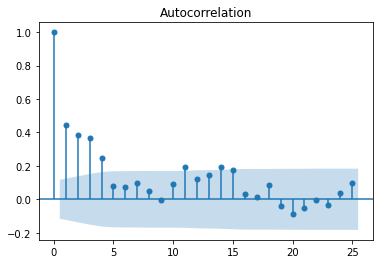

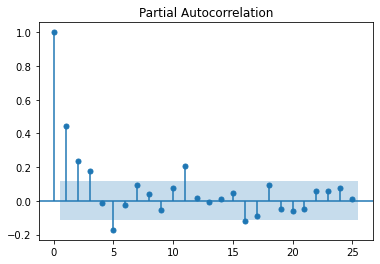

In [27]:
fig1=plot_acf(x_data['Seasonal_Difference1'].dropna())

fig2=plot_pacf(x_data['Seasonal_Difference1'].dropna())

In [28]:

#x_data.index = x_data.index.to_timestamp(freq ='5min')
x_data.index = pd.DatetimeIndex(x_data.index).to_period('5min')

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(x_data['speed'],order=(0,2,0),seasonal_order=(0, 1, 0, 288))
result=model.fit()

In [30]:
x_data.index = x_data.index.to_timestamp(freq ='5min')

In [31]:
from pandas.tseries.offsets import DateOffset


new_dates=[x_data.index[-1]+ DateOffset(minutes=5*x) for x in range(1,2881)] #2593

df_pred=pd.DataFrame(index=new_dates, columns =x_data.columns)


df_pred1 = pd.concat([x_data,df_pred],axis = 0)

In [32]:
df_pred1.index = pd.DatetimeIndex(df_pred1.index).to_period('5min')

#df_pred.index = df_pred.index.to_timestamp(freq ='5min')

<AxesSubplot:>

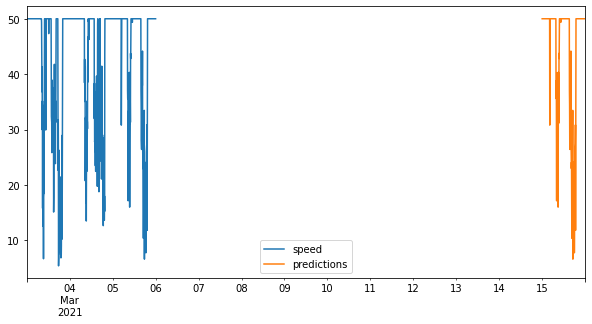

In [33]:


df_pred1['predictions'] = result.predict(start='2021-03-15 00:00:00', end='2021-03-15 23:55:00')
df_pred1[["speed","predictions"]].plot(figsize=(10,5))


<AxesSubplot:>

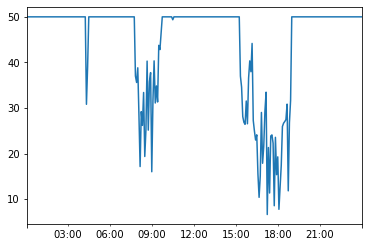

In [36]:
df_pred1[3450:]["predictions"].plot()

<AxesSubplot:xlabel='discoveryTime'>

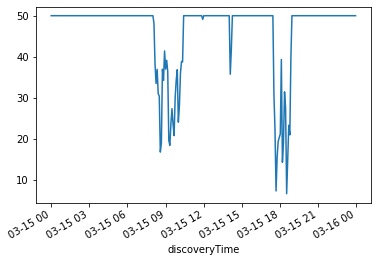

In [37]:
test_data = df4_testdata[df4_testdata.segmentId == 49]

test_data.set_index("discoveryTime",inplace=True)
test_data.index=pd.to_datetime(test_data.index)
test_data["speed"].plot()

In [38]:



df_predFiltered = df_pred1.iloc[3450:,:]
df_pred

,speed,1difference,2difference,Seasonal_Difference,Seasonal_Difference1
2021-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-03-06 00:05:00,NaN,NaN,NaN,NaN,NaN
2021-03-06 00:10:00,NaN,NaN,NaN,NaN,NaN
2021-03-06 00:15:00,NaN,NaN,NaN,NaN,NaN
2021-03-06 00:20:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-03-15 23:35:00,NaN,NaN,NaN,NaN,NaN
2021-03-15 23:40:00,NaN,NaN,NaN,NaN,NaN
2021-03-15 23:45:00,NaN,NaN,NaN,NaN,NaN
2021-03-15 23:50:00,NaN,NaN,NaN,NaN,NaN


In [39]:
df_pred1[3450:]["predictions"]

2021-03-15 00:00    50.00413
2021-03-15 00:05    50.00413
2021-03-15 00:10    50.00413
2021-03-15 00:15    50.00413
2021-03-15 00:20    50.00413
                      ...   
2021-03-15 23:35    50.00413
2021-03-15 23:40    50.00413
2021-03-15 23:45    50.00413
2021-03-15 23:50    50.00413
2021-03-15 23:55    50.00413
Freq: 5T, Name: predictions, Length: 288, dtype: float64

In [40]:
test_data = df4_testdata[df4_testdata.segmentId == 49]

test_data.reset_index(inplace = True)
test_data

,index,discoveryTime,segmentId,travelTime,coverage,lengthmm,speedLimitKph,speed
0,49,2021-03-15 00:00:00,49,0.000538,10,0.026905,50,50.00413
1,356,2021-03-15 00:05:00,49,0.000538,10,0.026905,50,50.00413
2,663,2021-03-15 00:10:00,49,0.000538,10,0.026905,50,50.00413
3,970,2021-03-15 00:15:00,49,0.000538,10,0.026905,50,50.00413
4,1277,2021-03-15 00:20:00,49,0.000538,10,0.026905,50,50.00413
...,...,...,...,...,...,...,...,...
264,81097,2021-03-15 23:36:00,49,0.000538,10,0.026905,50,50.00413
265,81404,2021-03-15 23:41:00,49,0.000538,10,0.026905,50,50.00413
266,81711,2021-03-15 23:46:00,49,0.000538,10,0.026905,50,50.00413
267,82018,2021-03-15 23:51:00,49,0.000538,10,0.026905,50,50.00413


In [54]:
yy_pred = df_pred1[3450:3637]["predictions"].values.reshape(len(df_pred1[3450:3637]["predictions"]),1)

yy_test = test_data[:187]["speed"].values.reshape(len(test_data[:187]["speed"]),1)


array([[50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50

In [56]:
def mSE(y_pred, y_test):
    
    return np.sum((y_pred- y_test)**2) / len(y_pred)




print("Mean Squared Error değeri: "+ str(round(mSE(yy_pred,yy_test),5)))


Mean Squared Error değeri: 56.47434


In [57]:
from sklearn.metrics import mean_squared_error

mean_squared_error(yy_pred,yy_test)


56.47434266812928